***Megaline Internet***

# Contenido<a id='contenido'></a>
* [Introducción](#int)
* [Inicialización de datos](#ini)
* [Preparación de datos](#pre)
* [Análisis de datos](#ana)
* [Prueba de hipótesis](#hip)
* [Conclusión general](#con)

# Introducción<a id='intr'></a>

El operador de telecomunicaciones Megaline ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para ajustar el presupuesto de publicidad.
Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan y la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

* Surf
    - Pago mensual: 20 USD
    - 500 minutos al mes, 50 SMS y 15 GB de datos
    - Si se exceden los límites del paquete:
    - 1 minuto: 3 centavos
    - 1 SMS: 3 centavos
    - 1 GB de datos: 10 USD
* Ultimate
    - Pago mensual: 70 USD
    - 3000 minutos al mes, 1000 SMS y 30 GB de datos
    - Si se exceden los límites del paquete:
    - 1 minuto: 1 centavo
    - 1 SMS: 1 centavo
    - 1 GB de datos: 7 USD

## Objetivos

Determinar cuál tarifa de prepago genera más ingresos, por lo que se tiene que probar las siguientes hipótesis:
*  El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.
*  El ingreso promedio de los usuarios en el área de estados Nueva York - Nueva Jersey es diferente al de los usuarios de otras regiones.


# Inicialización de datos<a id='ini'></a>

**Librerias y carga de datos**

In [1]:
# librerias
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
# carga de datos
try:
    calls    = pd.read_csv('megaline_calls.csv')
    internet = pd.read_csv('megaline_internet.csv')
    messages = pd.read_csv('megaline_messages.csv')
    plans    = pd.read_csv('megaline_plans.csv')
    users    = pd.read_csv('megaline_users.csv')
except:
    calls    = pd.read_csv('/datasets/megaline_calls.csv')
    internet = pd.read_csv('/datasets/megaline_internet.csv')
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    plans    = pd.read_csv('/datasets/megaline_plans.csv')
    users    = pd.read_csv('/datasets/megaline_users.csv')
    

**Exploración de datos iniciales:**

La tabla calls (datos sobre las llamadas):
* `id` — identificador único de la llamada
* `call_date` — fecha de la llamada
* `duration` — duración de la llamada (en minutos)
* `user_id` — el identificador del usuario que realiza la llamada

La tabla internet (datos sobre las sesiones web):
* `id` — identificador único de la sesión
* `mb_used` — el volumen de datos gastados durante la sesión (en megabytes)
* `session_date` — fecha de la sesión web
* `user_id` — identificador del usuario

La tabla messages (datos sobre los SMS):
* `id` — identificador único del SMS
* `message_date` — fecha del SMS
* `user_id` — el identificador del usuario que manda el SMS

La tabla plans (datos sobre las tarifas):
* `plan_name` — nombre de la tarifa
* `usd_monthly_fee` — pago mensual en dólares estadounidenses
* `minutes_included` — minutos incluidos al mes
* `messages_included` — SMS incluidos al mes
* `mb_per_month_included` — datos incluidos al mes (en megabytes)
* `usd_per_minute` — precio por minuto tras exceder los límites del paquete (por ejemplo, si el paquete incluye 100 minutos el operador cobrará el minuto 101)
* `usd_per_message` — precio por SMS tras exceder los límites del paquete
* `usd_per_gb` — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)

La tabla users (datos sobre los usuarios):
* `user_id` — identificador único del usuario
* `first_name` — nombre del usuario
* `last_name` — apellido del usuario
* `age` — edad del usuario (en años)
* `reg_date` — fecha de suscripción (dd, mm, aa)
* `churn_date` — fecha en que el usuario dejó de usar el servicio (si el valor es ausente, la tarifa se estaba usando cuando se recuperaron estos datos)
* `city` — ciudad de residencia del usuario
* `plan` — nombre de la tarifa

In [3]:
print('tabla calls')
display(calls.head())
calls.info()
print('registros duplicados: ', calls.duplicated().sum())

tabla calls


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
registros duplicados:  0


In [4]:
print('tabla internet')
display(internet.head())
internet.info()
print('registros duplicados: ', internet.duplicated().sum())

tabla internet


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
registros duplicados:  0


In [5]:
print('tabla messages')
display(messages.head())
messages.info()
print('registros duplicados: ', messages.duplicated().sum())

tabla messages


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
registros duplicados:  0


In [6]:
print('tabla plans')
display(plans.head())
plans.info()
print('registros duplicados: ', plans.duplicated().sum())

tabla plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
registros duplicados:  0


In [7]:
print('tabla users')
display(users.head())
users.info()
print('registros duplicados: ', plans.duplicated().sum())

tabla users


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
registros duplicados:  0


Se revisaron los datos inicialmente de las 5 tablas, y podemos indicar lo siguiente:


Tabla `calls`:
  * Hay 137735 registros y 4 columnas.
  * En la columna `call_date` el tipo de dato es object, debe cambiarse a tipo datetime.
  * No existen valores ausentes ni registros duplicados.

Tabla `internet`:
  * Hay 104825 registros y 4 columnas.
  * En la columna `session_date` el tipo de dato es object, debe cambiarse a tipo datetime.
  * No existen valores ausentes ni registros duplicados
  
Tabla `messages`:
  * Hay 76051 registros y 3 columnas.
  * En la columna `message_date` el tipo de dato es object, debe cambiarse a tipo datetime.
  * No existen valores ausentes ni registros duplicados.

Tabla `plans`:
  * Hay 2 registros y 8 columnas.
  * No existen valores ausentes ni registros duplicados.
  
Tabla `users`:
  * Hay 500 registros y 8 columnas.
  * En las columnas `reg_date` y `churn_date` el tipo de dato es object, debe cambiarse a tipo datetime.
  * La columna `churn_date` tiene 466 valores ausentes, lo que representa el 93% de los usuarios. El valor ausente representa que la tarifa se estaba usando cuando se generaron estos datos.

  * No existen registros duplicados.

# Preparación de datos<a id='pre'></a>

* Convierte los datos en los tipos necesarios
* Encuentra y elimina errores en los datos.
* Explica qué errores encontraste y cómo los eliminaste. Nota: muchas llamadas tienen duración de 0.0 minutos. Estas pueden ser llamadas perdidas. Tú decides si quieres preprocesar o no estos valores; evalúa cuánto afectaría su ausencia a los resultados de tu análisis.

Vamos a preparar los datos, empezemos realizando el cambio de tipo de datos necesario:

In [8]:
# cambiar a tipo fecha todas las fechas de todas las tablas
calls['call_date']       = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
users['reg_date']        = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date']      = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [9]:
# revisar tipos de datos cambiados

print(calls.call_date.dtype)
print(internet.session_date.dtype)
print(messages.message_date.dtype)
print(users.reg_date.dtype)
print(users.churn_date.dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


Cada llamada individual se redondea, incluso si la llamada duró solo un segundo, se contará como un minuto.

In [10]:
# redondeo de segundos a minutos en duration de calls
calls['duration'] = np.ceil(calls['duration'])
calls['duration']

0          9.0
1         14.0
2         15.0
3          6.0
4          5.0
          ... 
137730     9.0
137731    11.0
137732     9.0
137733     1.0
137734    14.0
Name: duration, Length: 137735, dtype: float64

In [11]:
# revisar duracion de llamadas en 0 segundos
print('llamadas con 0 segundos: ', len(calls.query('duration == 0')))

round(calls.duration.value_counts(normalize=True), ndigits=2).head()

llamadas con 0 segundos:  26834


0.0    0.19
6.0    0.06
5.0    0.06
7.0    0.06
8.0    0.06
Name: duration, dtype: float64

26834 de llamadas tienen duración 0, es decir el 19% de los registros. Las llamadas con duración 0 segundos son llamadas perdidas (no efectuadas) por los usuarios.  En este análisis necesitamos saber el tiempo mensual de llamadas, por lo que una llamada con 0 segundos no va a sumar al mensual. Dicho esto, decidimos eliminar todos los registros con duracion 0, ya que no representa información valiosa para nuestro análisis.

In [12]:
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9.0
1,1000_145,1000,2018-12-27,14.0
2,1000_247,1000,2018-12-27,15.0
3,1000_309,1000,2018-12-28,6.0
4,1000_380,1000,2018-12-30,5.0
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9.0
137731,1499_200,1499,2018-10-20,11.0
137732,1499_201,1499,2018-09-21,9.0
137733,1499_202,1499,2018-10-10,1.0


La tabla `calls` quedó con un total de 110901 registros eliminando las llamadas de 0 segundos, es decir se eliminaron 26834 registros.

In [13]:
# revisamos valores ausentes en users
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Hay 466 valores ausentes en la columna churn_date, esta columna registra la fecha que el usuario dejó de usar el servicio, al estar vacio este valor nos indica que el usuario sigue usando el servicio al término del año 2018. Dicho esto, se decide imputar los datos con la fecha 1 enero del 2019.

In [14]:
users.query('churn_date.isna()')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaT
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaT
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaT
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaT


In [15]:
# imputamos valores ausentes en churn_date
users['churn_date'] = users['churn_date'].fillna('2019-01-01')
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2019-01-01
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2019-01-01
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2019-01-01
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2019-01-01
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2019-01-01


In [16]:
# tipos de datos cambiados

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
print(users.churn_date.dtype)

datetime64[ns]


In [17]:
# comprobamos que se reemplazaron los valores ausentes
users.churn_date.isna().sum()

0

Como observamos fueron reemplazados los valores ausentes de churn_date con fecha 2019-01-01.

In [18]:
# revisamos tabla internet
internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [19]:
print('0mb: ', len(internet.query('mb_used == 0.00')))

0mb:  13747


In [20]:
internet.mb_used.value_counts(normalize=True).head()

0.00      0.131142
435.77    0.000076
414.46    0.000076
423.06    0.000067
417.46    0.000067
Name: mb_used, dtype: float64

En la tabla `internet` observamos que 13747 registros (el 13% de los datos) tienen una sesion de datos de 0 mb, estos registros pueden eliminarse ya que considero tampoco contiene información valiosa para este análisis.

In [21]:
# eliminamos registros de 0 mb
indexes_drop_2 = internet.query('mb_used == 0.00').index
internet = internet.drop(indexes_drop_2, axis=0).reset_index()

In [22]:
internet

,index,id,user_id,session_date,mb_used
0,0,1000_13,1000,2018-12-29,89.86
1,2,1000_379,1000,2018-12-28,660.40
2,3,1000_413,1000,2018-12-26,270.99
3,4,1000_442,1000,2018-12-27,880.22
4,5,1001_0,1001,2018-08-24,284.68
...,...,...,...,...,...
91073,104819,1499_214,1499,2018-10-18,261.13
91074,104820,1499_215,1499,2018-10-20,218.06
91075,104821,1499_216,1499,2018-12-30,304.72
91076,104822,1499_217,1499,2018-09-22,292.75


La tabla `internet` queda con 91078 registros, después que fueron eliminados los registros de mb_used en 0.0.

Vamos a calcular por cada usuario:
* El número de llamadas realizadas y minutos utilizados al mes.
* La cantidad de los SMS enviados por mes.
* El volumen de datos por mes.
* Los ingresos mensuales de cada usuario (resta el límite del paquete gratuito del número total de llamadas, SMS y datos; multiplica el resultado por el valor de tarifa de llamadas; agrega el cargo mensual según la tarifa de llamadas)

In [23]:
# agregamos columna mes en 3 tablas
calls['month']   = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month']  = pd.DatetimeIndex(messages['message_date']).month

In [24]:
# llamadas realizadas y minutos utilizados al mes
calls_users = calls.pivot_table(index=['user_id','month'], 
                                values='duration', 
                                aggfunc=['count', 'sum']).reset_index()

calls_users.columns = ['user_id', 'month', 'calls_used', 'minutes_used']
calls_users

,user_id,month,calls_used,minutes_used
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


In [25]:
# SMS enviados por mes
sms_users = messages.pivot_table(index=['user_id', 'month'],
                                 values='message_date',
                                 aggfunc='count').reset_index()

sms_users.columns = ['user_id', 'month', 'sms_used']
sms_users

,user_id,month,sms_used
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [26]:
# GB de datos usados por mes
internet_users = internet.pivot_table(index=['user_id', 'month'], 
                                      values='mb_used', 
                                      aggfunc='sum').reset_index()

# redondea de MB a GB por mes
internet_users['mb_used'] = internet_users['mb_used'].apply(
    lambda x: math.ceil(x/1024))

internet_users.columns = ['user_id', 'month', 'gb_used']
internet_users

,user_id,month,gb_used
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
...,...,...,...
2272,1498,12,23
2273,1499,9,13
2274,1499,10,20
2275,1499,11,17


Hemos creado 3 tablas resumen de llamadas, mensajes y datos usados. Vamos a crear una nueva tabla donde nos muestre por usuario todos estos datos juntos.

In [27]:
# tabla resumen de usuarios uniendo calls_users, sms_users y internet_users
users_resume = calls_users.merge(     sms_users, on=['user_id', 'month'], how='outer'
                         ).merge(internet_users, on=['user_id', 'month'], how='outer'
                         ).fillna(value=0)

In [28]:
users_resume

,user_id,month,calls_used,minutes_used,sms_used,gb_used
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13.0
2289,1361,5,0.0,0.0,2.0,2.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,1.0


In [29]:
# verificamos la tabla resumen de usuarios con las tablas individuales calls_users, sms_users y internet_users, con el fin
# de que los merges estén correctamente mezclados sin perder información. El ejemplo a continuación con cualquier usuario

user = 1222 # usuario al azar
print('summary users')
display(users_resume.query('user_id == @user'))

print('internet used per user')
display(internet_users.query('user_id == @user'))

print('messages used per user')
display(sms_users.query('user_id == @user'))

print('calls used per user')
display(calls_users.query('user_id == @user'))

summary users


,user_id,month,calls_used,minutes_used,sms_used,gb_used
1027,1222,6,2.0,14.0,2.0,0.0
1028,1222,7,90.0,699.0,23.0,24.0
1029,1222,8,78.0,526.0,20.0,18.0
1030,1222,9,67.0,565.0,18.0,17.0
1031,1222,10,83.0,672.0,27.0,20.0
1032,1222,11,83.0,618.0,12.0,18.0
1033,1222,12,94.0,637.0,24.0,15.0


internet used per user


,user_id,month,gb_used
1054,1222,7,24
1055,1222,8,18
1056,1222,9,17
1057,1222,10,20
1058,1222,11,18
1059,1222,12,15


messages used per user


,user_id,month,sms_used
830,1222,6,2
831,1222,7,23
832,1222,8,20
833,1222,9,18
834,1222,10,27
835,1222,11,12
836,1222,12,24


calls used per user


,user_id,month,calls_used,minutes_used
1027,1222,6,2,14.0
1028,1222,7,90,699.0
1029,1222,8,78,526.0
1030,1222,9,67,565.0
1031,1222,10,83,672.0
1032,1222,11,83,618.0
1033,1222,12,94,637.0


Ok, hasta ahora tenemos nuestra tabla resumen con 2293 registros y 6 columnas.

Pero seguiremos sumando nuevas columnas a la tabla. Ahora, calcularemos los ingresos mensuales de cada usuario (resta el límite del paquete gratuito del número total de llamadas, SMS y datos; multiplica el resultado por el valor de tarifa de llamadas; agrega el cargo mensual según la tarifa de llamadas)

In [30]:
# agregamos la columna plan en nuestra tabla resumen
users_resume = users_resume.merge(users[['user_id', 'plan']], on='user_id')

In [31]:
users_resume

,user_id,month,calls_used,minutes_used,sms_used,gb_used,plan
0,1000,12,16.0,124.0,11.0,2.0,ultimate
1,1001,8,27.0,182.0,30.0,7.0,surf
2,1001,9,49.0,315.0,44.0,14.0,surf
3,1001,10,65.0,393.0,53.0,22.0,surf
4,1001,11,64.0,426.0,36.0,19.0,surf
...,...,...,...,...,...,...,...
2288,1204,12,0.0,0.0,78.0,36.0,ultimate
2289,1349,10,0.0,0.0,76.0,13.0,surf
2290,1349,11,0.0,0.0,72.0,17.0,surf
2291,1349,12,0.0,0.0,61.0,13.0,surf


In [32]:
# renombramos columna plan_name por plan en tabla plans
plans.rename({'plan_name': 'plan'}, axis='columns', inplace=True)

In [33]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [34]:
# agregamos columnas de la tabla plans y agregamos a nuestra tabla resumen users_resumen. Algunas serán temporales
users_resume = users_resume.merge(plans, on='plan')
# dejamos ordenada la tabla por user_id
users_resume.sort_values(by='user_id', inplace=True)

In [35]:
users_resume

,user_id,month,calls_used,minutes_used,sms_used,gb_used,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,16.0,124.0,11.0,2.0,ultimate,1000,30720,3000,70,7,0.01,0.01
723,1001,11,64.0,426.0,36.0,19.0,surf,50,15360,500,20,10,0.03,0.03
724,1001,12,56.0,412.0,44.0,19.0,surf,50,15360,500,20,10,0.03,0.03
722,1001,10,65.0,393.0,53.0,22.0,surf,50,15360,500,20,10,0.03,0.03
720,1001,8,27.0,182.0,30.0,7.0,surf,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,1498,12,39.0,339.0,0.0,23.0,surf,50,15360,500,20,10,0.03,0.03
2262,1499,9,41.0,346.0,0.0,13.0,surf,50,15360,500,20,10,0.03,0.03
2263,1499,10,53.0,385.0,0.0,20.0,surf,50,15360,500,20,10,0.03,0.03
2265,1499,12,65.0,496.0,0.0,22.0,surf,50,15360,500,20,10,0.03,0.03


Hemos agregado nuevas columnas de la tabla plans a nuestra tabla resumen. Estas columnas son:
- messages_included	
- mb_per_month_included	
- minutes_included	
- usd_monthly_pay	
- usd_per_gb
- usd_per_message	
- usd_per_minute

varias columnas serán temporales porque se usarán para realizar cálculos.

A continuación, renombraremos las nuevas columnas para tener una mejor vista a la tabla resumen.

In [36]:
users_resume.rename({'messages_included': 'sms', 
                     'mb_per_month_included':'gb',
                     'minutes_included': 'minutes',
                     'usd_monthly_pay': 'price',
                     'usd_per_gb': 'gb_price',
                     'usd_per_message': 'sms_price',
                     'usd_per_minute': 'minute_price'},
                    axis=1,
                   inplace=True)

Cambiamos Megabytes por Gigabytes

In [37]:
# transforma MB a GB 
users_resume['gb'] = users_resume['gb'].apply(lambda x: math.floor(x/1024))

In [38]:
users_resume

,user_id,month,calls_used,minutes_used,sms_used,gb_used,plan,sms,gb,minutes,price,gb_price,sms_price,minute_price
0,1000,12,16.0,124.0,11.0,2.0,ultimate,1000,30,3000,70,7,0.01,0.01
723,1001,11,64.0,426.0,36.0,19.0,surf,50,15,500,20,10,0.03,0.03
724,1001,12,56.0,412.0,44.0,19.0,surf,50,15,500,20,10,0.03,0.03
722,1001,10,65.0,393.0,53.0,22.0,surf,50,15,500,20,10,0.03,0.03
720,1001,8,27.0,182.0,30.0,7.0,surf,50,15,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,1498,12,39.0,339.0,0.0,23.0,surf,50,15,500,20,10,0.03,0.03
2262,1499,9,41.0,346.0,0.0,13.0,surf,50,15,500,20,10,0.03,0.03
2263,1499,10,53.0,385.0,0.0,20.0,surf,50,15,500,20,10,0.03,0.03
2265,1499,12,65.0,496.0,0.0,22.0,surf,50,15,500,20,10,0.03,0.03


Realizaremos nuevos cálculos sobre recargos adicionales por uso de sms, minutos y datos

In [39]:
# agregamos columna de cargo por mensajes adicionales usados al mes
users_resume['sms_charge'] = (users_resume['sms_used'] - users_resume['sms']) * users_resume['sms_price']
users_resume['sms_charge'] = users_resume['sms_charge'].apply(lambda x: 0 if(x < 0) else x)

In [40]:
# agregamos columna de cargo por minutos adicionales usados al mes
users_resume['min_charge'] = (users_resume['minutes_used'] - users_resume['minutes']) * users_resume['minute_price']
users_resume['min_charge'] = users_resume['min_charge'].apply(lambda x: 0 if(x < 0) else x)

In [41]:
# agregamos columna de cargo por datos en GB adicionales usados al mes
users_resume['gb_charge'] = (users_resume['gb_used'] - users_resume['gb']) * users_resume['gb_price']
users_resume['gb_charge'] = users_resume['gb_charge'].apply(lambda x: 0 if(x < 0) else x)

In [42]:
# agregamos columna de surcharge con el total de recargo adicional 
users_resume['surcharge'] = users_resume['sms_charge'] + users_resume['min_charge'] + users_resume['gb_charge']

In [43]:
# agregamos columna full_charge con el total a pagar mensual por usuario (valor del plan + recargo)
users_resume['full_charge'] = users_resume['surcharge'] + users_resume['price']

In [44]:
users_resume

,user_id,month,calls_used,minutes_used,sms_used,gb_used,plan,sms,gb,minutes,price,gb_price,sms_price,minute_price,sms_charge,min_charge,gb_charge,surcharge,full_charge
0,1000,12,16.0,124.0,11.0,2.0,ultimate,1000,30,3000,70,7,0.01,0.01,0.00,0.0,0.0,0.00,70.00
723,1001,11,64.0,426.0,36.0,19.0,surf,50,15,500,20,10,0.03,0.03,0.00,0.0,40.0,40.00,60.00
724,1001,12,56.0,412.0,44.0,19.0,surf,50,15,500,20,10,0.03,0.03,0.00,0.0,40.0,40.00,60.00
722,1001,10,65.0,393.0,53.0,22.0,surf,50,15,500,20,10,0.03,0.03,0.09,0.0,70.0,70.09,90.09
720,1001,8,27.0,182.0,30.0,7.0,surf,50,15,500,20,10,0.03,0.03,0.00,0.0,0.0,0.00,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2261,1498,12,39.0,339.0,0.0,23.0,surf,50,15,500,20,10,0.03,0.03,0.00,0.0,80.0,80.00,100.00
2262,1499,9,41.0,346.0,0.0,13.0,surf,50,15,500,20,10,0.03,0.03,0.00,0.0,0.0,0.00,20.00
2263,1499,10,53.0,385.0,0.0,20.0,surf,50,15,500,20,10,0.03,0.03,0.00,0.0,50.0,50.00,70.00
2265,1499,12,65.0,496.0,0.0,22.0,surf,50,15,500,20,10,0.03,0.03,0.00,0.0,70.0,70.00,90.00


In [45]:
# eliminamos columnas innecesaria
users_resume.drop(columns=['sms', 'gb', 'minutes', 'price', 
                           'sms_price', 'gb_price', 'minute_price', 'sms_price',
                           'sms_charge', 'gb_charge', 'min_charge', 'surcharge'], 
                  inplace=True)

In [46]:
# agregamos ciudad a la tabla puesto que usaremos esta información en la hipótesis.
users_resume = users_resume.merge(users[['user_id','city']], on='user_id')

In [47]:
# hacemos mas cortas las ciudades
#users_resume['city'] = users_resume['city'].str.split(',').str.get(1)

In [48]:
# eliminamos espacios en blanco al principio de la columna city
users_resume['city'] = users_resume['city'].str.strip()

In [49]:
# mostramos tabla
users_resume

,user_id,month,calls_used,minutes_used,sms_used,gb_used,plan,full_charge,city
0,1000,12,16.0,124.0,11.0,2.0,ultimate,70.00,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,11,64.0,426.0,36.0,19.0,surf,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,12,56.0,412.0,44.0,19.0,surf,60.00,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,65.0,393.0,53.0,22.0,surf,90.09,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,8,27.0,182.0,30.0,7.0,surf,20.00,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23.0,surf,100.00,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2289,1499,9,41.0,346.0,0.0,13.0,surf,20.00,"Orlando-Kissimmee-Sanford, FL MSA"
2290,1499,10,53.0,385.0,0.0,20.0,surf,70.00,"Orlando-Kissimmee-Sanford, FL MSA"
2291,1499,12,65.0,496.0,0.0,22.0,surf,90.00,"Orlando-Kissimmee-Sanford, FL MSA"


Se realizaron los cálculos de recargos de consumos adicionales de sms, minutos y GB de datos: `sms_charge` , `minutes_charge`, `gb_charge`, y el total de recargo por los tres servicios está en `surcharge` y el valor total a pagar por cada cliente en cada mes en la columna `full_charge` que suma el recargo + valor del plan mensual. También se adicionó la columna city, que usaremos en la hipótesis más adelante. Y se borraron varias columnas temporales.

Finalmente, nuestra tabla resumen está depurada, y ha quedado con las columnas necesarias. 

# Análisis de datos<a id='ana'></a>

Empezamos, describiendo el comportamiento de los clientes a continuación:

In [50]:
users.plan.value_counts(normalize=True)

surf        0.678
ultimate    0.322
Name: plan, dtype: float64

En el 2018 el 68% de los usuarios contrataron el plan surf, mientras que el 32% contrataron el plan ultimate. 

Pero como fueron los consumos de los clientes de cada servicio: llamadas, mensajes y datos. Revisemos a continuación.

## Análisis de consumo de minutos que requieren los usuarios por mes

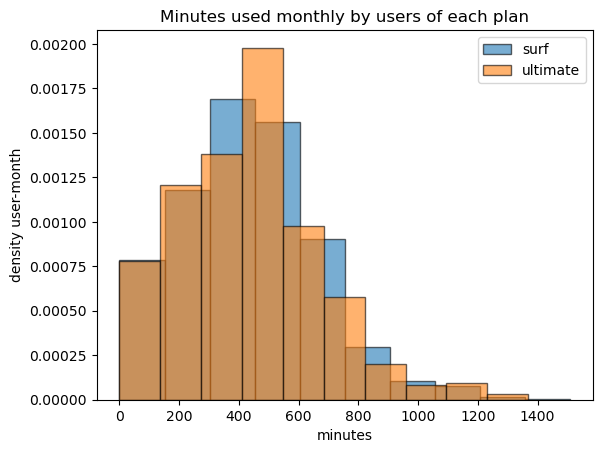

In [51]:
# Mostramos uso de minutos por usuarios
min_used_surf = users_resume.query('plan=="surf"')['minutes_used']
min_used_ulti = users_resume.query('plan=="ultimate"')['minutes_used']

plt.hist(min_used_surf, alpha=0.6, edgecolor ='black', label='surf', density=True)
plt.hist(min_used_ulti, alpha=0.6, edgecolor ='black', label='ultimate', density=True)
plt.title('Minutes used monthly by users of each plan')
plt.legend()
plt.xlabel('minutes')
plt.ylabel('density user-month')
plt.show()

Los histogramas de Surf y Ultimate nos muestran que las distribuciones son asimétricas, los datos están sesgados a la derecha en ambos conjuntos de datos; son notables los datos atípicos altos, es decir existen pocos clientes con consumos de más de 1000 minutos al mes.

En ambos planes el consumo de minutos que requieren los usuarios mensualmente es algo similar; en el pico más alto notamos que la mayoría de usuarios *Surf* consumen aproximadamente 400 minutos mensuales, y la mayoría de usuarios con plan *Ultimate* consumen 500 minutos mensuales.

In [52]:
# Calculamos el promedio, la varianza y la distribución estandar de nuestra distribución 
mean_min_surf = np.mean(min_used_surf).round(0).astype(int)
var_min_surf  = np.var(min_used_surf).round(0).astype(int)
std_min_surf  = np.std(min_used_surf).round(0).astype(int)

mean_min_ulti = np.mean(min_used_ulti).round(0).astype(int)
var_min_ulti  = np.var(min_used_ulti).round(0).astype(int)
std_min_ulti  = np.std(min_used_ulti).round(0).astype(int)

print('Minutes SURF')
print('mean:', mean_min_surf)
print('variance:', var_min_surf)
print('standard deviation:', std_min_surf)
print()
print('Minutes ULTIMATE')
print('mean:', mean_min_ulti)
print('variance:', var_min_ulti)
print('standard deviation:', std_min_ulti)


Minutes SURF
mean: 429
variance: 54933
standard deviation: 234

Minutes ULTIMATE
mean: 430
variance: 57764
standard deviation: 240


El consumo promedio de minutos de usuarios *Surf* es de 429 y el de *Ultimate* es de 430, muy similar.

De acuerdo a las desviaciones estándar calculadas / varianzas podemos notar que los minutos usados por los usuarios *Ultimate* son un poco más dispersos que en los usuarios *Surf*

## Análisis de consumo de mensajes de texto que requieren los usuarios por mes

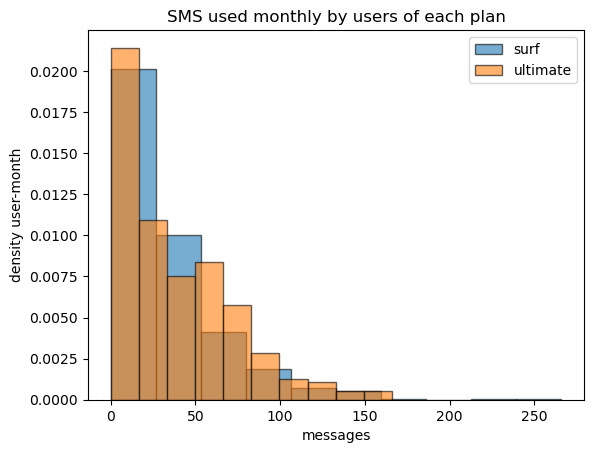

In [53]:
# Mostramos uso de sms por usuarios
sms_used_surf = users_resume.query('plan == "surf"')['sms_used']
sms_used_ulti = users_resume.query('plan == "ultimate"')['sms_used']

plt.hist(sms_used_surf, alpha=0.6,  edgecolor ='black', label='surf', density=True)
plt.hist(sms_used_ulti, alpha=0.6,  edgecolor ='black', label='ultimate', density=True)
plt.title('SMS used monthly by users of each plan')
plt.legend()
plt.xlabel('messages')
plt.ylabel('density user-month')
plt.show()

Los histogramas de *Surf* y *Ultimate* nos muestran que las distribuciones son asimétricas, los datos están sesgados totalmente a la derecha en ambos conjuntos de datos; son notables los datos atípicos altos, es decir existen clientes con consumos de más de 100 minutos al mes.

El comportamiento de la mayoría de usuarios es similar en ambos planes, usan pocos mensajes de texto; la mayoría de usuarios *Surf*  consumen al menos 10 mensajes mensuales y la mayoría de usuarios *Ultimate* consumen al menos 20 mensajes de texto mensuales.

In [54]:
mean_sms_surf = np.mean(sms_used_surf).round(0).astype(int)
var_sms_surf  = np.var(sms_used_surf).round(0).astype(int)
std_sms_surf  = np.std(sms_used_surf).round(0).astype(int)

mean_sms_ulti = np.mean(sms_used_ulti).round(0).astype(int)
var_sms_ulti  = np.var(sms_used_ulti).round(0).astype(int)
std_sms_ulti  = np.std(sms_used_ulti).round(0).astype(int)

print('SMS SURF')
print('mean:', mean_sms_surf)
print('variance:', var_sms_surf)
print('standard deviation:', std_sms_surf)
print()
print('SMS ULTIMATE')
print('mean:', mean_sms_ulti)
print('variance:', var_sms_ulti)
print('standard deviation:', std_sms_ulti)


SMS SURF
mean: 31
variance: 1126
standard deviation: 34

SMS ULTIMATE
mean: 38
variance: 1207
standard deviation: 35


El consumo promedio de mensajes de texto de usuarios *Surf* es de 31 y el de *Ultimate* es de 38, no muy diferentes.

De acuerdo a las desviaciones estándar calculadas / varianzas podemos notar que los mensajes de texto usados por los usuarios *Ultimate* se dispersan de manera similar a los usuarios *Surf*

## Análisis de consumo de datos (Gigabytes) que requieren los usuarios por mes

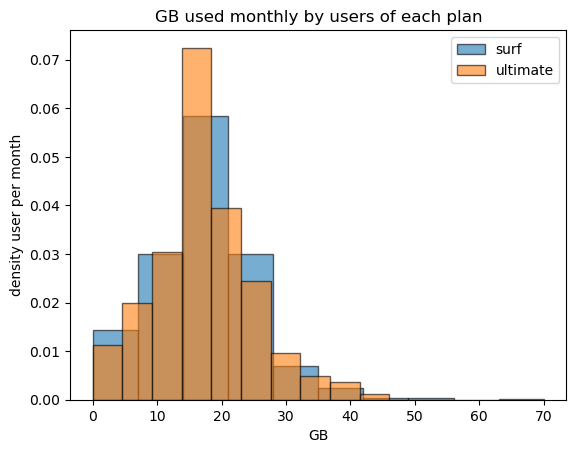

In [55]:
# Mostramos uso de GB por usuarios
gb_used_surf = users_resume.query('plan == "surf"')['gb_used']
gb_used_ulti = users_resume.query('plan == "ultimate"')['gb_used']

plt.hist(gb_used_surf, alpha=0.6, edgecolor ='black', label='surf', density=True)
plt.hist(gb_used_ulti, alpha=0.6, edgecolor ='black', label='ultimate', density=True)
plt.title('GB used monthly by users of each plan')
plt.legend()
plt.xlabel('GB')
plt.ylabel('density user per month')
plt.show()

Los histogramas de *Surf* y *Ultimate* nos muestran que las distribuciones casi normales, con un leve sesgo a la derecha en ambos conjuntos de datos; aparecen valores atípicos altos, es decir existen pocos clientes con consumos de más de 40 Gibabytes de datos al mes.

El comportamiento de los usuarios es similar para *Surf* y *Ultimate* el pico más alto en ambos casos nos dice que la mayoría de usuarios requieren unos 17 Gigabytes de datos para navegar en internet.

In [56]:
# Calculamos el promedio, la varianza y la distribución estandar de nuestra distribución 

mean_gb_surf = np.mean(gb_used_surf).round(0).astype(int)
var_gb_surf  = np.var(gb_used_surf).round(0).astype(int)
std_gb_surf  = np.std(gb_used_surf).round(0).astype(int)

mean_gb_ulti = np.mean(gb_used_ulti).round(0).astype(int)
var_gb_ulti  = np.var(gb_used_ulti).round(0).astype(int)
std_gb_ulti  = np.std(gb_used_ulti).round(0).astype(int)

print('Minutes SURF')
print('mean:', mean_gb_surf)
print('variance:', var_gb_surf)
print('standard deviation:', std_gb_surf)
print()
print('Minutes ULTIMATE')
print('mean:', mean_gb_ulti)
print('variance:', var_gb_ulti)
print('standard deviation:', std_gb_ulti)


Minutes SURF
mean: 17
variance: 62
standard deviation: 8

Minutes ULTIMATE
mean: 17
variance: 59
standard deviation: 8


El consumo promedio de Gigabytes de datos de usuarios *Surf* y *Ultimate* es de 17, tal como nos muestra las distribuciones en los histogramas correspondientes.

De acuerdo a las desviaciones estándar calculadas / varianzas podemos notar que los datos consumidos por los usuarios *Surf* y *Ultimate* se comportan igual, sus datos están dispersos de la misma manera en ambos planes.

# Prueba de hipótesis<a id='hip'></a>

## **Ingreso promedio de los usuarios de las tarifas Ultimate y Surf**

Antes de empezar con la prueba de hipótesis resumiremos los ingresos totales en los usuarios con tarifa *Ultimate* y *Surf*.

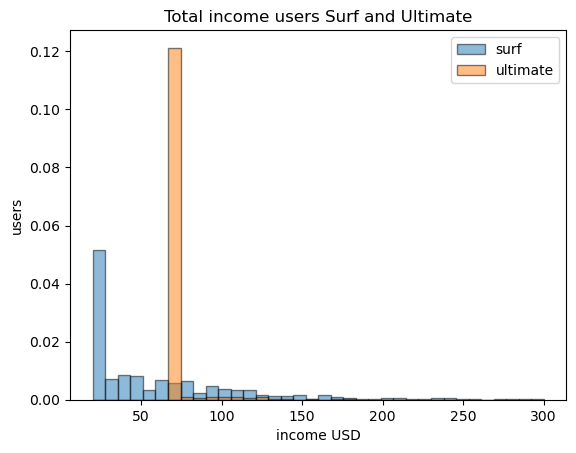

In [57]:
# Filtramos usuarios surf y ultimate
surf = users_resume.query('plan == "surf"')['full_charge']
ulti = users_resume.query('plan == "ultimate"')['full_charge']


# histograma de total de ingresos de los usuarios en cada plan
plt.hist(surf, alpha=0.5, label ='surf', ec ='black', density=True, range=(20, 300), bins=36)
plt.hist(ulti, alpha=0.5, label='ultimate', ec ='black', density=True, range=(20, 300), bins=36)

plt.legend()
plt.title('Total income users Surf and Ultimate')
plt.legend()
plt.xlabel('income USD')
plt.ylabel('users')

plt.show()

La mayoría de usuarios *Surf* pagan 20 USD y la mayoría de usuarios *Ultimate* pagan 70 USD, es decir la mayoría de los usuarios no pagan más de lo que cuesta el plan de cada tarifa base.

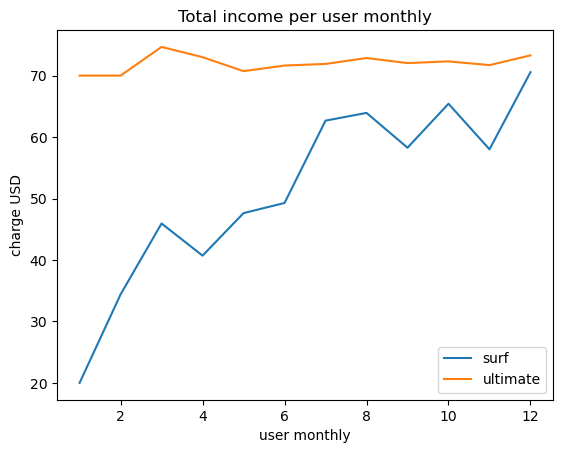

In [58]:
# Cobros mensuales promedios de los usuarios en cada plan
mean_charge_plan = users_resume.pivot_table(index='month', columns='plan', values='full_charge', aggfunc='mean')

plt.plot(mean_charge_plan, label=['surf', 'ultimate'])
plt.title('Total income per user monthly')
plt.legend()
plt.xlabel('user monthly')
plt.ylabel('charge USD')
plt.show()

Como dato adicional, podemos observar que el promedio de ingresos por los usuarios con el plan Ultimate tuvieron un comportamiento regular por los 70 USD en todo el año, notándose una variación desde febrero a junio un poco más alta en consumos, el resto del año el comportamiento es similar. 

Por otro lado los ingresos obtenidos de los usuarios con plan Surf es ascendente a medida que los meses transcurrieron, empezando desde el consumo base de 20 USD hasta los 70 USD en diciembre. Notablemente terminaron consumiendo más de los servicios que habían contratado.

### Prueba de hipótesis 1

A continuación realizaremos la formulación de hipótesis nula H0 e hipótesis alternativa Ha. El nivel de significancia será del 5% asumiendo que el nivel de confianza es del 95%.

*  **H0: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf son iguales**.
*  Ha: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf son diferentes.
*  alpha 0.05

In [59]:
alpha = 0.05
results = st.ttest_ind(surf, ulti)

print('p-value: ', results.pvalue)
, 
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  2.862674510698644e-08
Rechazamos la hipótesis nula


In [60]:
# promedios de ingresos de usuarios Surf y usuarios Ultimate
print(f'Average income users Surf $ {surf.mean():.2f}')
print(f'Average income users Ultimate $ {ulti.mean():.2f}')

Average income users Surf $ 60.71
Average income users Ultimate $ 72.31


Rechazamos la hipótesis nula, es decir podemos concluir que es falsa la hipótesis de que el ingreso promedio de los usuarios de las tarifas Ultimate y Surf son iguales. El ingreso promedio por usuarios Surf es de 60.71 USD y el ingreso promedio por usuarios Ultimate es de 72.31 USD.

## Ingreso promedio de los usuarios en el área de estados Nueva York - Nueva Jersey y  usuarios de otras regiones

Antes de empezar con la prueba de hipótesis 2, mostraremos los ingresos en los usuarios de estados New York-Newark Jersey y del resto de estados.

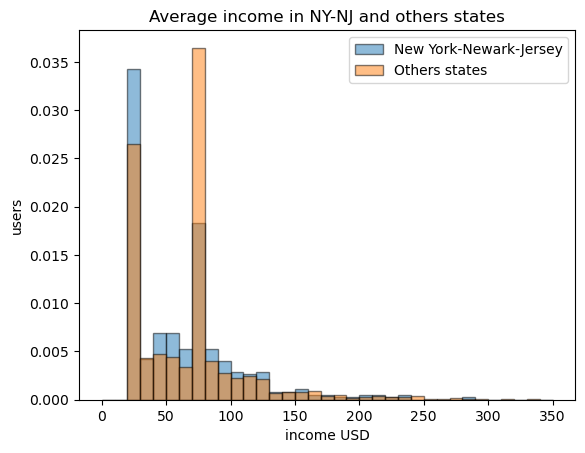

In [61]:
# Filtramos usuarios de NY-NJ y usuarios del resto de estados
ny_nj  = users_resume.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')['full_charge']
others = users_resume.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')['full_charge']

# histograma de total de ingresos de los usuarios dentro y fuera del estado de New York-Newark Jersey.

plt.hist(ny_nj, alpha=0.5, label ='New York-Newark-Jersey', ec ='black', density=True, range=(0, 350), bins=35)
plt.hist(others, alpha=0.5, label='Others states', ec ='black', density=True, range=(0, 350), bins=35)

plt.legend()
plt.title('Average income in NY-NJ and others states')
plt.legend()
plt.xlabel('income USD')
plt.ylabel('users')

plt.show()

Resumiendo nuestro histograma, la mayoría de los usuarios de New York-Newark Jersey pagan entre 20 a 30 USD por consumos en sus planes. Y la mayoría de los usuarios de otras ciudades pagan entre 70 a 80 USD por el consumo de sus servicios.

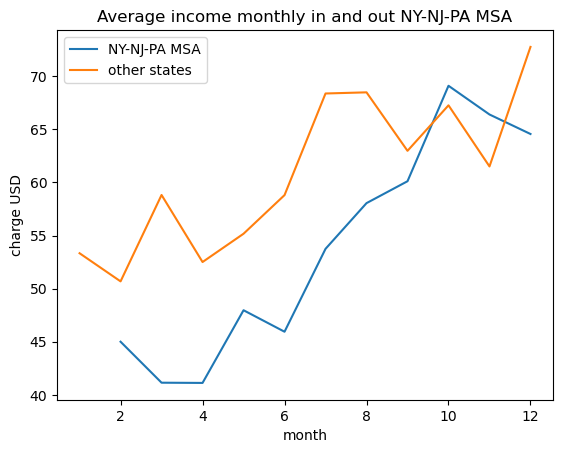

In [62]:
# Cobros mensuales promedios de los usuarios dentro y fuera de New York Newak Jersey

in_ny = users_resume.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')[['full_charge','month']]
out_ny = users_resume.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')[['full_charge','month']]

plt.plot(in_ny.pivot_table(index='month',  values='full_charge', aggfunc='mean'), label='NY-NJ-PA MSA')
plt.plot(out_ny.pivot_table(index='month', values='full_charge', aggfunc='mean'), label='other states')

plt.title('Average income monthly in and out NY-NJ-PA MSA')
plt.legend()
plt.xlabel('month')
plt.ylabel('charge USD')
plt.show()

Como dato adicional, podemos observar que en el estado de NY-NJ en el primer semestre los usuarios pagaron por debajo de los 50 usd, y en el último semestre del año sus pagos suben de manera ascendente hasta los 65 USD.

Por otro lado los ingresos obtenidos de los usuarios del resto de estados el primer semestre empieza sobre los 50 USD alcanzando hasta final de año un pago de servicios de más de 65 USD.

### Prueba de hipótesis 2

Formulación de hipótesis nula H0 e hipótesis alternativa Ha. El nivel de significancia es del 5% asumiendo que el nivel de confianza es del 95%.

*  **H0: El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es igual al de los usuarios de otras regiones**.
*  Ha: El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.
*  alpha 0.05

In [63]:
alpha = 0.05
results = st.ttest_ind(ny_nj, others)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.043557431621342436
Rechazamos la hipótesis nula


In [64]:
# promedios de ingresos dentro y fuera del estado NY-NJ-PA MSA
print(f'Average income in of NY-NJ-PA MSA is: {ny_nj.mean():.2f}')
print(f'Average income out of NY-NJ-PA MSA is: {others.mean():.2f}')

Average income in of NY-NJ-PA MSA is: 59.92
Average income out of NY-NJ-PA MSA is: 65.22


Rechazamos la hipótesis nula, es decir, la afirmación de que el ingreso promedio de los usuarios en el estado "New York-Newark-Jersey City, NY-NJ-PA MSA" es igual al de otros estados, se descarta. El ingreso promedio por usuarios del area de estados New York-Newark Jersey es de 59.92 USD y el ingreso promedio de otros estados es de 65.22 USD.

# Conclusión general<a id='con'></a>

En la fase inicial creamos una tabla resumen con la información de 5 tablas previstas por Megaline, esta tabla es llamada `users_resume` con un total de 2293 registros y 9 columnas, contiene registros de 500 usuarios por mes sobre las llamadas, mensajes y datos usados, cobros por servicios y ciudad/estado al que pertenece. Las columnas en esta tabla son: user_id,month, calls_used, minutes_used, sms_used, gb_used, plan, full_charge, city.

Después se analizó el comportamiento de los usuarios respecto a los consumos que necesitaron cada mes en cada tarifa y obtuvimos que:

* *Consumo Minutos*: La mayoría de usuarios *Surf* consumen aproximadamente 400 minutos mensuales, y la mayoría de usuarios con plan *Ultimate* consumen 500 minutos mensuales. El consumo promedio de minutos de usuarios *Surf* es de 429 y el de *Ultimate* es de 430, muy similar. Existen clientes atípicos con consumos de más de 1000 minutos al mes en ambos planes.


* *Consumo SMS*: En ambos planes los usuarios usan pocos mensajes de texto; la mayoría de usuarios *Surf*  consumen al menos 10 mensajes mensuales y la mayoría de usuarios *Ultimate* consumen al menos 20 mensajes de texto mensuales. Existen usuarios con consumos atípico de más de 100 minutos al mes. El consumo promedio de mensajes de texto de usuarios *Surf* es de 31 y el de *Ultimate* es de 38, no muy diferentes.


* *Consumo GB*: El consumo es similar para usuarios *Surf* y *Ultimate* la mayoría de usuarios requieren unos 17 Gigabytes de datos para navegar en internet. Existen usuarios atípicos con consumos de más de 40 Gibabytes de datos al mes. El consumo promedio de Gigabytes de datos de usuarios *Surf* y *Ultimate* es de 17.



Finalmente, hicimos 2 pruebas de hipótesis:


**Hipotesis 1: El ingreso promedio de los usuarios de las tarifas Ultimate y Surf es igual** 

Rechazamos la hipótesis nula, es decir es falsa la hipótesis de que el ingreso promedio de los usuarios de las tarifas Ultimate y Surf son iguales. 

El plan más rentable es el Ultimate. Ya que su ingreso promedio es de 72.31 USD y el de usuarios Surf es de 60.71 USD.

**Hipótesis 2: El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es igual al de los usuarios de otras regiones.**

Rechazamos la hipótesis nula, es decir, el ingreso promedio de los usuarios en el estado "New York-Newark-Jersey City, NY-NJ-PA MSA" es diferente al de otros estados. 

Los usuarios de New York-Newark Jersey no son más rentables que los usuarios del resto de estados, ya que el primero tiene un ingreso promedio de 59.92 USD y el segundo es de 65.22 USD.